# THÔNG TIN NHÓM:

## Thành Viên:
**MSSV**       | **Họ và tên** 
-----------|----------------
19120485   | Dương Thanh Hiệp 
19120528   | Nguyễn Nhật Huy
19120572   | Hồ Công Lượng 

## Phân công công việc:
**Phân công công việc** | **Họ và tên** | **Mức độ hoàn thành**
-----------|---------------- |-------------------
Thu thập dữ liệu, khai phá, tiền xử lí, trực quan các trường đơn| Nguyễn Nhật Huy   |100%
Tìm hiểu, trực quan các biểu đồ quan hệ, hoàn thiện notebook   | Dương Thanh Hiệp, Hồ Công Lượng|100%


## Mức độ hoàn thành công việc:
**Công việc**       | **Họ và tên** 
-----------|----------------
Thu thập dữ liệu   | 100% 
Khai phá dữ liệu   | 100%
Tiền xử lý dữ liệu | 100%
Trực quan hóa dữ liệu | 100% 

#IMPORT THƯ VIỆN:

In [ ]:
import re
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

#THU THẬP DỮ LIỆU

In [ ]:
def crawl_data(file_out):
  url = "https://www.worldometers.info/coronavirus/"
  data = requests.get(url).text

  soup = BeautifulSoup(data, 'html.parser')
  table = soup.find("table", {"id": "main_table_countries_yesterday"})

  df = pd.DataFrame(columns=['Country, Other', 'Total_Cases', 'New_Cases', 'Total_Deaths', 'New_Deaths' , 'Total_Recovered', 'New_Recovered', 
                            'Active_Cases', 'Serious, Critical', 'Tot Cases/ 1M pop', 'Deaths/ 1M pop', 'Total_Tests', 'Tests/ 1M pop', 'Population', 'Continent'])

  for row in table.tbody.find_all('tr'):
    columns = row.find_all('td')  

    if columns != []:
      #columns[0] is index so we can skip
      country = columns[1].text.strip()
      total_case = columns[2].text.strip()
      new_case = columns[3].text.strip()
      total_deaths = columns[4].text.strip()
      new_deaths = columns[5].text.strip()
      total_recovered = columns[6].text.strip()
      new_recovered = columns[7].text.strip()
      active_case = columns[8].text.strip()
      serious = columns[9].text.strip()
      tot_case = columns[10].text.strip()
      deaths = columns[11].text.strip()
      total_tests = columns[12].text.strip()
      tests = columns[13].text.strip()
      population = columns[14].text.strip()
      continent = columns[15].text.strip()
      
      df = df.append({'Country, Other': country,  'Total_Cases': total_case, 'New_Cases': new_case, 'Total_Deaths': total_deaths, 
              'New_Deaths': new_deaths, 'Total_Recovered': total_recovered, 'New_Recovered': new_recovered, 'Active_Cases': active_case, 'Serious, Critical': serious, 
              'Tot Cases/ 1M pop': tot_case, 'Deaths/ 1M pop': deaths, 'Total_Tests': total_tests, 'Tests/ 1M pop': tests, 'Population': population, 'Continent': continent}, ignore_index=True)
      
    df.to_csv(file_out, index=False, encoding='utf-8') 

In [ ]:
#ví dụ
crawl_data('30-4-2022-raw.csv')


**1.   Chi tiết quá trình thu thập dữ liệu:**
* Thực hiện phương thức GET và lấy toàn bộ nội dung của trang web https://www.worldometers.info/coronavirus/ và parse vào parse tree của BeautifulSoup.
* Theo default columns từ trang web chỉ hiện thị 13 trường nên nhóm quyết định chỉ thực hiện crawl dữ liệu với 14 trường (thêm cột continent).
* Từ trang web có thể thấy bảng cung cấp thống kê COVID-19 cho hôm nay, hôm qua và 2 ngày trước. Để dữ liệu được toàn vẹn nên nhóm đã thu thập dữ 3 ngày là (28,29,30-2-2022) ở thẻ Yesterday.
* Sử dụng phương thức find() để tìm kiếm nội dung trong 'table' có id = 'main_table_countries_yesterday'. 
* Sử dụng phương thức find_all() và tag 'tr' để lấy dữ liệu từng hàng, tiếp tục dùng tag 'td' để lấy dữ liệu của từng cột và append vào dataframe đã được tạo trước đó.
* Lưu dữ liệu thành file csv với tên file đã được truyền vào (ex: day-raw.csv.

**2.   Nhận xét:**
* Dữ liệu mà nhóm thực hiện crawl đầy đủ và chính xác theo trang web.

#EDA
**Sử dụng 1 ngày trong dữ liệu thu thập được để khai phá và kiểm tra dữ liệu**

In [ ]:
df = pd.read_csv('30-4-2022-raw.csv')
df

,"Country, Other",Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,New_Recovered,Active_Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total_Tests,Tests/ 1M pop,Population,Continent
0,Asia,"155,183,717","+263,368","1,430,883",+301,"147,805,242","+304,296","5,947,592","11,188",NaN,NaN,NaN,NaN,NaN,Asia
1,North America,"101,290,593","+108,394","1,473,368",+350,"95,702,818","+76,300","4,114,407","7,939",NaN,NaN,NaN,NaN,NaN,North America
2,South America,"57,561,155","+50,948","1,298,445",+153,"53,462,310","+25,057","2,800,400","10,490",NaN,NaN,NaN,NaN,NaN,South America
3,Europe,"196,014,605","+73,138","1,839,849",+464,"184,907,234","+205,894","9,267,522","6,965",NaN,NaN,NaN,NaN,NaN,Europe
4,Oceania,"8,603,508","+46,084","12,160",+69,"8,161,713","+55,472","429,635",132,NaN,NaN,NaN,NaN,NaN,Australia/Oceania
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,Niue,9,NaN,NaN,NaN,9,NaN,0,NaN,"5,464",NaN,NaN,NaN,"1,647",Australia/Oceania
235,Nauru,8,NaN,NaN,NaN,8,NaN,0,NaN,730,NaN,NaN,NaN,"10,953",Australia/Oceania
236,Tuvalu,3,NaN,NaN,NaN,NaN,NaN,3,NaN,249,NaN,NaN,NaN,"12,068",Australia/Oceania


**Ý nghĩa của mỗi dòng và từng trường dữ liệu**


1.   Dòng: Mỗi dòng thống kê cho chúng ta biết các số liệu về COVID - 19 ở từng quốc gia, châu lục.
2.   Cột:
*   "Country, Other": Tên đất nước hoặc châu lục.
*   "Total_case": Tổng số ca mắc Covid trong nước, châu lục.
*   "New_Case": Số ca mắc Covid mới trong ngày.
*   "Total_Deaths": Tổng số ca tử vong khi mắc Covid.
*   "New_Deaths":  Số ca tử vong mới trong ngày.
*   "Total_Recoverd": Tổng số ca hồi phục sau khi mắc Covid.
*   "New_Recoverd": Số ca hồi phục trong ngày.
*   "Active_Cases": Số ca nghi nhiễm (F0, F1 , v.v).
*   "Serious, Critical": Số ca nguy kịch.
*   "Tot Cases/ 1M pop": Số ca mắc Covid trên 1 triệu dân.
*   "Deaths/ 1M pop": Số ca tử vong do Covid trên 1 triệu dân.
*   "Total_Tests": Số ca test Covid.
*   "Test/ 1M pop": Số người test Covid trên 1 triệu dân.
*   "Population": Dân số của quốc gia, châu lục.
*   "Continent": Châu lục mà quốc gia thuộc về.




**Có bao nhiều mẫu, trường dữ liệu ?**

In [ ]:
print(f'Số mẫu: {df.shape[0]}')
print(f'Số trường dữ liệu: {df.shape[1]}')

Số mẫu: 238
Số trường dữ liệu: 15


**Có dòng nào bị lặp không ?**

In [ ]:
check_duplicated = df.duplicated().any() or df['Country, Other'].duplicated().any()
check_duplicated

False

**Dữ liệu bị khuyết ?**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country, Other     237 non-null    object
 1   Total_Cases        238 non-null    object
 2   New_Cases          121 non-null    object
 3   Total_Deaths       229 non-null    object
 4   New_Deaths         59 non-null     object
 5   Total_Recovered    215 non-null    object
 6   New_Recovered      109 non-null    object
 7   Active_Cases       216 non-null    object
 8   Serious, Critical  151 non-null    object
 9   Tot Cases/ 1M pop  229 non-null    object
 10  Deaths/ 1M pop     220 non-null    object
 11  Total_Tests        213 non-null    object
 12  Tests/ 1M pop      213 non-null    object
 13  Population         228 non-null    object
 14  Continent          235 non-null    object
dtypes: object(15)
memory usage: 28.0+ KB



* Các trường New_Cases, New_Deaths, New_Recovered bị khuyết dữ liệu khá lớn.
* Dữ liệu bị khuyết lớn đều là các cột cập từng ngày vì vậy dữ liệu có thể do không có không có ca mắc, tử vong hay hồi phục trong ngày.

**Kiểu dữ liệu của từng trường**
* Ngoài trường Country, Other và Continent là biến categorical thì các trường còn lại là biến numerical.
* Tập dữ liệu bao gồm các quốc gia của các châu lục: Asia, North America, South America, Europe,Australia/Oceania, Africa.
* Dễ dàng nhận thấy ngoại trừ các trường Country, Other và Continent thì các trường còn lại đang có kiểu dữ liệu không phù hợp, chúng ta cần dữ liệu những truờng này ở dạng số để thao tác.

In [ ]:
df.nunique()

Country, Other       237
Total_Cases          237
New_Cases            107
Total_Deaths         219
New_Deaths            36
Total_Recovered      214
New_Recovered        101
Active_Cases         201
Serious, Critical     84
Tot Cases/ 1M pop    229
Deaths/ 1M pop       204
Total_Tests          213
Tests/ 1M pop        213
Population           228
Continent              7
dtype: int64

* Dữ liệu có 236 mẫu nhưng unique value đếm được ở trường Country, Other chỉ cho 235 cho thấy có một mẫu dữ liệu dư thừa mà chúng ta cần xử lý.


#TIỀN XỬ LÝ DỮ LIỆU

In [ ]:
def preprocessing_data(file_in, file_out_nation, file_out_continent):
  #xóa các dòng mà không có tên đất nước, châu lục
  df = pd.read_csv(file_in)
  df = df.drop(labels = df.index[df['Country, Other'].isnull()], axis = 0)

  #các cột cần chuyển về dạng numerical
  numerical_cols = ['Total_Cases', 'New_Cases', 'Total_Deaths',
       'New_Deaths', 'Total_Recovered', 'New_Recovered', 'Active_Cases',
       'Serious, Critical', 'Tot Cases/ 1M pop', 'Deaths/ 1M pop',
       'Total_Tests', 'Tests/ 1M pop', 'Population']

  for columns in numerical_cols:
    df[columns] =  df[columns].apply(lambda x: re.sub('[,+]','', str(x)))
  df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce', downcast = 'float')
  
  #lúc crawl dữ liệu chúng ta đã hợp các thread giữa các châu lục và quốc gia
  #tách các quốc gia và châu lục, giữ dòng world ở file nation
  
  out1 = df[(df['Country, Other'] != df['Continent']) & (df['Country, Other'] != 'Oceania')]
  out2 = df[(df['Country, Other'] == df['Continent']) | (df['Country, Other'] == 'Oceania')]
  out2 = out2.drop(labels = ['Tot Cases/ 1M pop', 'Deaths/ 1M pop', 'Total_Tests', 'Tests/ 1M pop', 'Population', 'Continent'], axis=1)

  #tạo file kết quả
  out1.to_csv(file_out_nation, index=False, encoding='utf-8')
  out2.to_csv(file_out_continent, index=False, encoding='utf-8')

In [ ]:
#ví dụ
preprocessing_data('30-4-2022-raw.csv','30-4-2022-nation.csv', '30-4-2022-continent.csv')


**Chi tiết quá trình tiền xử lý dữ liệu:**
* Thực hiện xóa các mẫu không cung cấp thông tin, ở đây là mẫu không chứa tên quốc gia, châu lục.
* Liệt kê các cột cần chuyển về dạng số.
* Xóa các ký tự ',+' nằm trong các dữ liệu.
* Tách dataframe thành 2 dataframe riêng biệt gồm dataframe chứa các mẫu thông tin quốc gia, thế giới và dataframe chứa các mẫu thông tin châu lục.
* Lưu dữ liệu thành 2 file với tên đã được truyền vào (ex: day-nation.csv, day-continent.csv)

## Kiểm tra dữ liệu

In [ ]:
nation = pd.read_csv('30-4-2022-nation.csv')
nation

,"Country, Other",Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,New_Recovered,Active_Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total_Tests,Tests/ 1M pop,Population,Continent
0,World,530786180.0,546967.0,6309547.0,1375.0,501363620.0,672922.0,23113008.0,37677.0,68095.0,809.5,NaN,NaN,NaN,All
1,China,223837.0,102.0,5226.0,1.0,215339.0,216.0,3272.0,169.0,156.0,4.0,1.600000e+08,111163.0,1.439324e+09,Asia
2,USA,85699850.0,98249.0,1031218.0,263.0,81998220.0,59581.0,2670406.0,2487.0,256060.0,3081.0,1.028176e+09,3072057.0,3.346864e+08,North America
3,India,43150216.0,2685.0,524572.0,33.0,42609336.0,2158.0,16308.0,698.0,30695.0,373.0,8.493249e+08,604177.0,1.405754e+09,Asia
4,Brazil,30921144.0,40633.0,666365.0,117.0,29939872.0,22602.0,314907.0,8318.0,143534.0,3093.0,6.377617e+07,296045.0,2.154271e+08,South America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,MS Zaandam,9.0,NaN,2.0,NaN,7.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Niue,9.0,NaN,NaN,NaN,9.0,NaN,0.0,NaN,5464.0,NaN,NaN,NaN,1.647000e+03,Australia/Oceania
228,Nauru,8.0,NaN,NaN,NaN,8.0,NaN,0.0,NaN,730.0,NaN,NaN,NaN,1.095300e+04,Australia/Oceania
229,Tuvalu,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,249.0,NaN,NaN,NaN,1.206800e+04,Australia/Oceania


In [ ]:
continent = pd.read_csv('30-4-2022-continent.csv')
continent

,"Country, Other",Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,New_Recovered,Active_Cases,"Serious, Critical"
0,Asia,155183710.0,263368.0,1430883.0,301.0,147805250.0,304296.0,5947592.0,11188.0
1,North America,101290590.0,108394.0,1473368.0,350.0,95702820.0,76300.0,4114407.0,7939.0
2,South America,57561156.0,50948.0,1298445.0,153.0,53462310.0,25057.0,2800400.0,10490.0
3,Europe,196014610.0,73138.0,1839849.0,464.0,184907230.0,205894.0,9267522.0,6965.0
4,Oceania,8603508.0,46084.0,12160.0,69.0,8161713.0,55472.0,429635.0,132.0
5,Africa,12131870.0,5035.0,254827.0,38.0,11323591.0,5903.0,553452.0,963.0


In [ ]:
nation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country, Other     231 non-null    object 
 1   Total_Cases        231 non-null    float64
 2   New_Cases          115 non-null    float64
 3   Total_Deaths       222 non-null    float64
 4   New_Deaths         53 non-null     float64
 5   Total_Recovered    208 non-null    float64
 6   New_Recovered      103 non-null    float64
 7   Active_Cases       209 non-null    float64
 8   Serious, Critical  144 non-null    float64
 9   Tot Cases/ 1M pop  229 non-null    float64
 10  Deaths/ 1M pop     220 non-null    float64
 11  Total_Tests        213 non-null    float64
 12  Tests/ 1M pop      213 non-null    float64
 13  Population         228 non-null    float64
 14  Continent          229 non-null    object 
dtypes: float64(13), object(2)
memory usage: 27.2+ KB


In [ ]:
nation.describe()

,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,New_Recovered,Active_Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total_Tests,Tests/ 1M pop,Population
count,2.310000e+02,115.000000,2.220000e+02,53.000000,2.080000e+02,103.000000,2.090000e+02,144.000000,229.000000,220.000000,2.130000e+02,2.130000e+02,2.280000e+02
mean,4.595551e+06,9512.469565,5.684277e+04,51.886792,4.752636e+06,13065.514563,1.802922e+05,523.291667,150130.475983,1157.770455,3.023978e+07,2.008140e+06,3.477432e+07
std,3.559113e+07,53232.364748,4.330629e+05,190.795366,3.544585e+07,68420.641493,1.614032e+06,3242.275465,157381.602477,1211.574075,1.085767e+08,3.437727e+06,1.384665e+08
min,2.000000e+00,1.000000,1.000000e+00,1.000000,2.000000e+00,1.000000,0.000000e+00,1.000000,16.000000,2.000000,5.117000e+03,5.090000e+03,8.050000e+02
25%,2.349400e+04,35.000000,2.235000e+02,1.000000,1.652350e+04,39.000000,1.770000e+02,5.000000,11641.000000,167.000000,3.457420e+05,1.699040e+05,5.303148e+05
50%,1.796620e+05,185.000000,2.191000e+03,7.000000,1.528035e+05,277.000000,1.596000e+03,18.000000,97687.000000,788.500000,2.168616e+06,7.767250e+05,5.803350e+06
75%,1.136291e+06,810.500000,1.402300e+04,37.000000,1.086265e+06,2565.500000,1.922300e+04,131.500000,256738.000000,1854.250000,1.322048e+07,2.350763e+06,2.246769e+07
max,5.307862e+08,546967.000000,6.309547e+06,1375.000000,5.013636e+08,672922.000000,2.311301e+07,37677.000000,704216.000000,6298.000000,1.028176e+09,2.185437e+07,1.439324e+09


In [ ]:
continent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country, Other     6 non-null      object 
 1   Total_Cases        6 non-null      float64
 2   New_Cases          6 non-null      float64
 3   Total_Deaths       6 non-null      float64
 4   New_Deaths         6 non-null      float64
 5   Total_Recovered    6 non-null      float64
 6   New_Recovered      6 non-null      float64
 7   Active_Cases       6 non-null      float64
 8   Serious, Critical  6 non-null      float64
dtypes: float64(8), object(1)
memory usage: 560.0+ bytes


In [ ]:
continent.describe()

,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,New_Recovered,Active_Cases,"Serious, Critical"
count,6.000000e+00,6.000000,6.000000e+00,6.000000,6.000000e+00,6.000000,6.000000e+00,6.000000
mean,8.846424e+07,91161.166667,1.051589e+06,229.166667,8.356049e+07,112153.666667,3.852168e+06,6279.500000
std,7.660607e+07,90932.683718,7.374680e+05,169.060246,7.260170e+07,117540.849591,3.390785e+06,4713.861718
min,8.603508e+06,5035.000000,1.216000e+04,38.000000,8.161713e+06,5903.000000,4.296350e+05,132.000000
25%,2.348919e+07,47300.000000,5.157315e+05,90.000000,2.185827e+07,32660.750000,1.115189e+06,2463.500000
50%,7.942587e+07,62043.000000,1.364664e+06,227.000000,7.458256e+07,65886.000000,3.457404e+06,7452.000000
75%,1.417104e+08,99580.000000,1.462747e+06,337.750000,1.347796e+08,173495.500000,5.489296e+06,9852.250000
max,1.960146e+08,263368.000000,1.839849e+06,464.000000,1.849072e+08,304296.000000,9.267522e+06,11188.000000


#TRỰC QUAN HÓA DỮ LIỆU

# Trực quan các trường đơn

#Line Chart

In [ ]:
days_list = ['28-4-2022','29-4-2022','30-4-2022']
df_list = [pd.read_csv(day + '-nation.csv') for day in days_list]

new_cases_days = [df.iloc[0,2] for df in df_list]

plt.rcParams["figure.figsize"] = (12,8)

plt.plot(days_list, new_cases_days)
plt.title('Biểu đồ thể hiện số ca mắc COVID-19 mới trên thế giới')
plt.xlabel('Ngày')
plt.ylabel('Ca')
plt.show()

FileNotFoundError: ignored

* Biểu đồ cho chúng ta thấy xu hướng số ca mắc COVID-19 mới trên thế giới
* Số ca mắc COVID-19 mới có xu hướng giảm từ ngày 28-4-2022 tới ngày 29-4-2022 và từ đó liên tục tăng cho tới ngày 30-4-2022

Kết luận: Có thể sử dụng biểu đồ Line Chart để đánh gia xu hướng không chỉ New_Cases mà còn các trường khác như New_Deaths, New_Recovered, ...

## Bar Plot

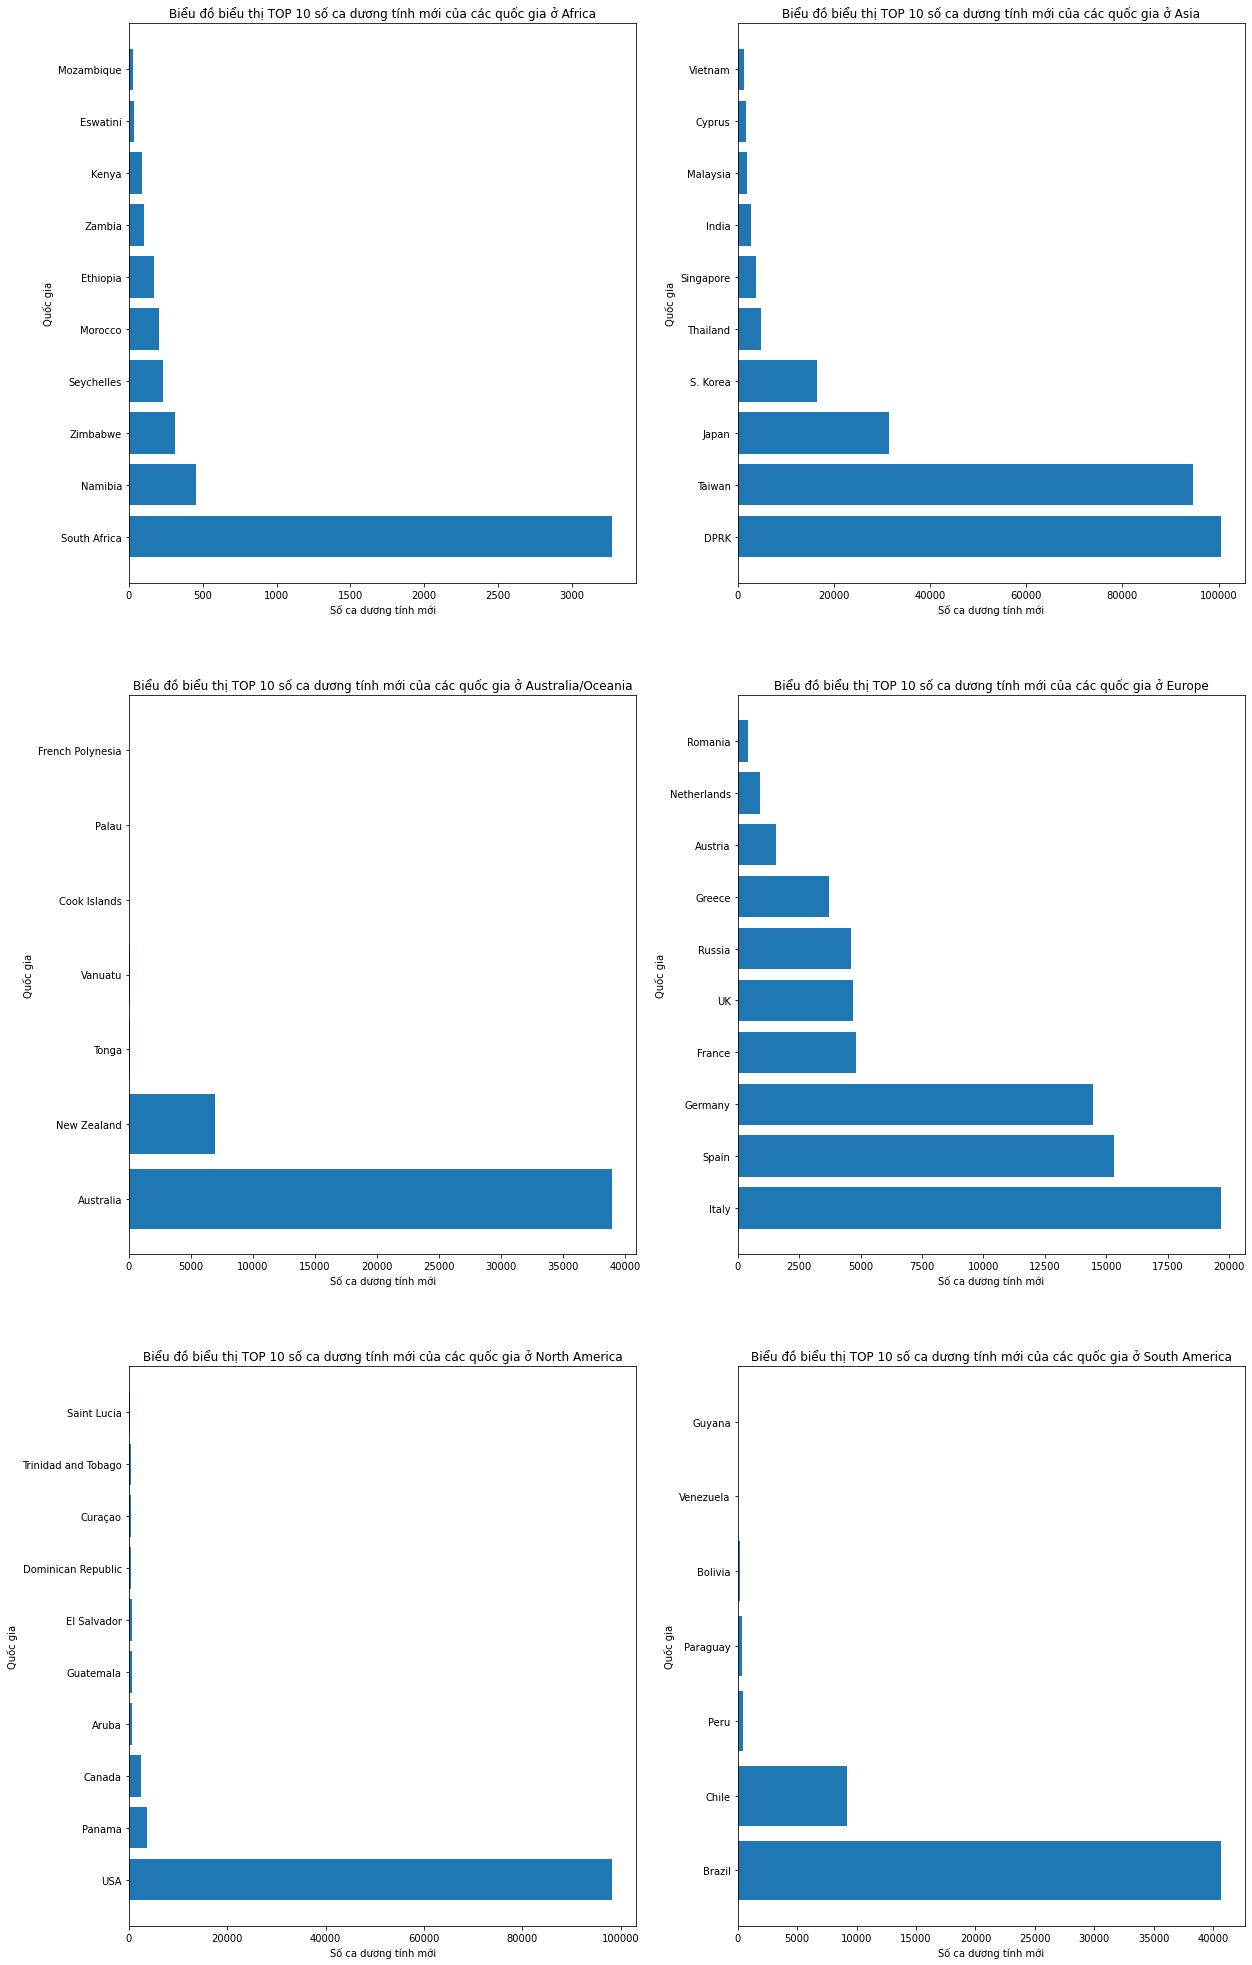

In [ ]:
df_nation = nation[nation['Country, Other'] != 'World']
fig, axs = plt.subplots(3, 2, figsize=(20, 35))

for n,(key, group) in enumerate(df_nation.groupby('Continent')):
    data = group[['Country, Other','New_Cases']].sort_values(by = ['New_Cases'], ascending = False).head(10)
    plt.subplot(3, 2, n+1)
 
    plt.xlabel("Số ca dương tính mới")
    plt.ylabel("Quốc gia")
    plt.title('Biểu đồ biểu thị TOP 10 số ca dương tính mới của các quốc gia ở ' + key)
    plt.barh(data['Country, Other'],data['New_Cases'])

Từ các Bar Plot trên ta có thể rút ra được:
* Ở từng biểu đồ có thể cho ta thấy được những quốc gia đang ở đỉnh của đại dịch COVID-19 của từng châu lục
* Ở Châu phi thì South Africa đang là quốc gia có số ca dương tính lớn nhất, tương tự là USA ở Bắc Mỹ, Brazil ở Nam Mỹ, Australia ở Austrilia/Oceania, Germany ở Châu Âu và Korea ở Châu Á
* Germany là quốc gia đang phải hứng chịu dịch COVID-19 nặng nề nhất trên 6 châu lục khi có hơn 160000 ca nhiễm mới trong 1 ngày.
* Nhìn chung Châu Phi là châu lục có ít ca nhiễm mới nhất khi TOP 10 quốc gia
có số ca nhiễm mới có tổng số ca nhiễm rất thấp, ngược lại là Châu Âu.

###Pie chart

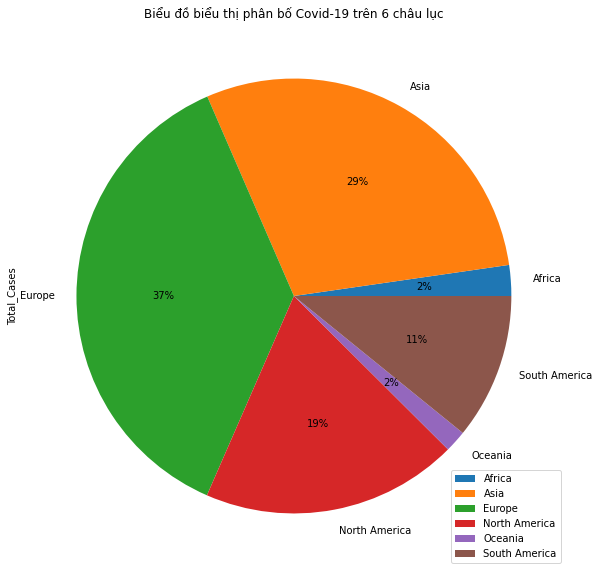

In [ ]:
titles = 'Biểu đồ biểu thị phân bố Covid-19 trên 6 châu lục'
df_continent = continent[['Country, Other', 'Total_Cases']]
df_continent.groupby('Country, Other').sum().plot.pie(y = 'Total_Cases', autopct='%1.0f%%', figsize = (15,10), title = titles)

 Ở đây chúng ta sẽ thấy được phân bố của dịch Covid-19 trên 6 châu lục và rút ra rằng:
 * Châu Âu là châu lục đang chịu ảnh hưởng lớn nhất bởi COVID-19, kế đến là Châu Á.
 * Covid-19 chủ yếu phân bố ở Châu Á, Bắc Mỹ, Châu Âu. 
 * Oceania và Châu phi là 2 châu lục ít ảnh hưởng nhất bởi số dân ít hơn các châu lục khác.
 * Ngoài Oceania và Châu Phi thì các châu lục còn lại cần phải cố gắng hơn để hạn chế những ca nhiễm mới.
 

# Quan hệ giữa nhiều trường

## Multiple bar plot

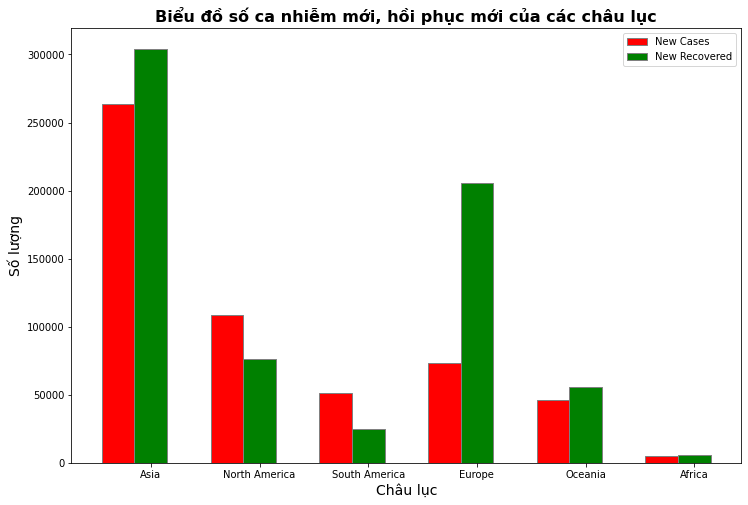

In [ ]:
barWidth = 0.3
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
new_case = continent['New_Cases']
new_recovered = continent['New_Recovered']
continent_name = continent['Country, Other']
 
# Set position of bar on X axis
br1 = np.arange(len(new_case))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, new_case, color ='r', width = barWidth,
        edgecolor ='grey', label ='New Cases')
plt.bar(br2, new_recovered, color ='g', width = barWidth,
        edgecolor ='grey', label ='New Recovered')
 
# Adding Xticks
plt.title('Biểu đồ số ca nhiễm mới, hồi phục mới của các châu lục', fontweight ='bold', fontsize = 16 )
plt.xlabel('Châu lục', fontsize = 14)
plt.ylabel('Số lượng', fontsize = 14)
plt.xticks([r + barWidth for r in range(len(new_case))], continent_name )
 
plt.legend()
plt.show()

So sánh số ca nhiễm mới và số ca hồi phục mới giúp ta đánh giá được tình hình dịch bệnh ở các châu lục:


*   Các châu lục như: Asia, Australia/Oceania, Africa có số ca nhiễm mới lớn hơn so với số ca phục hồi mới --> tình hình dịch bệnh căng thẳng.
*   Các châu lục: Europe, North/South America thì ngược lại có số ca nhiễm mới ít hơn --> dịch bệnh đang giảm nhẹ, trong gia đoạn phục hồi.


## Bar Plot

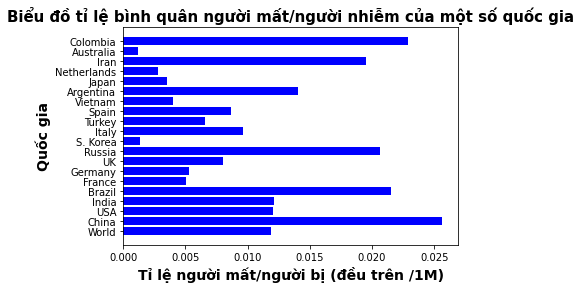

In [ ]:
nation['death/case(/1M pop)'] = nation['Deaths/ 1M pop']/nation['Tot Cases/ 1M pop']
y_sample = nation['death/case(/1M pop)'].head(20)
x_sample = nation['Country, Other'].head(20)
plt.barh(x_sample, y_sample, color ='blue')
 
plt.ylabel("Quốc gia",  fontweight ='bold', fontsize = 14)
plt.xlabel("Tỉ lệ người mất/người bị (đều trên /1M)", fontweight ='bold', fontsize = 14)
plt.title("Biểu đồ tỉ lệ bình quân người mất/người nhiễm của một số quốc gia", fontweight ='bold', fontsize = 15 )
plt.show()

Biểu đồ cho thấy sự chênh lệch tỉ lệ người mất / người bị (đều trên 1M population) giữa một số quốc gia và thế giới.


*   Các quốc gia như: Việt Nam, Hàn Quốc, Nhật, Hà Lan, Pháp, Đức...có tỉ lệ người mất nhỏ so với bình quân của thế giới do có biện pháp y tế thích hợp, đội ngủ các bên phối hợp chăm sóc tốt cho sức khỏe người dân.
*   Các quốc gia như: Trung Quốc, Brazil, Nga, Indonesia, Colombia, Iran thì tỉ lệ này rất cao so với bình quân của thế giới chứng tỏ sự chăm sóc y tế đối với các trường hợp nhiễm bệnh ở các quốc gia này chưa tốt, khiến nhiều người hi sinh.



## Stacked bar chart

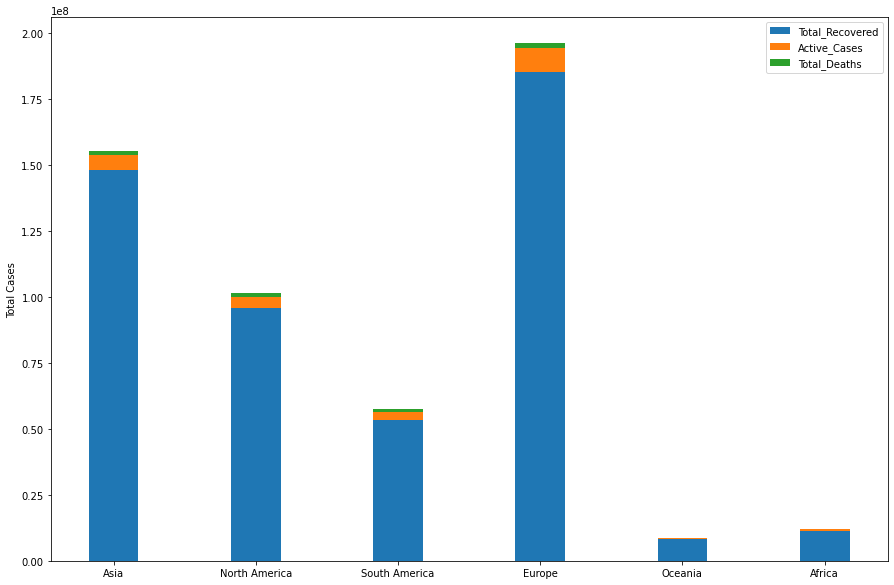

In [ ]:
labels = continent['Country, Other']

totalDeaths = continent['Total_Deaths']
totalRecovered = continent['Total_Recovered']
activeCases = np.array(continent['Active_Cases'])

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize = (15,10))

ax.bar(labels, totalRecovered, width, label='Total_Recovered')
ax.bar(labels, activeCases, width, bottom=totalRecovered, label='Active_Cases')
ax.bar(labels, totalDeaths, width, bottom=totalRecovered + activeCases,label='Total_Deaths')

ax.set_ylabel('Total Cases')
ax.legend()

plt.show()

Biểu đồ cho thấy được sự chênh lệch về số ca nhiễm, cũng như so sánh được tình hình các bệnh nhân Covid giữa các châu lục:

- Số ca nhiễm của các nước ở châu Á và châu Âu khá cao, trong khi đó thì ở Oceania và Africa lại khá thấp.
- Dựa vào bản đồ trên, ta thấy được các ca nhiễm gần như đã hồi phục, các ca còn dương tính hoặc chết chiếm tỉ lệ khá thấp. 
- Bên cạnh đó thì các nước ở châu Á và châu Âu số ca đang dương tính cũng còn tương đối khá cao, còn ở các nước ở Oceania và Africa thì số ca chết lại rất rất thấp.

## Heatmap
**Biểu đồ thể hiện hệ số tương quan giữa các trường dữ liệu**

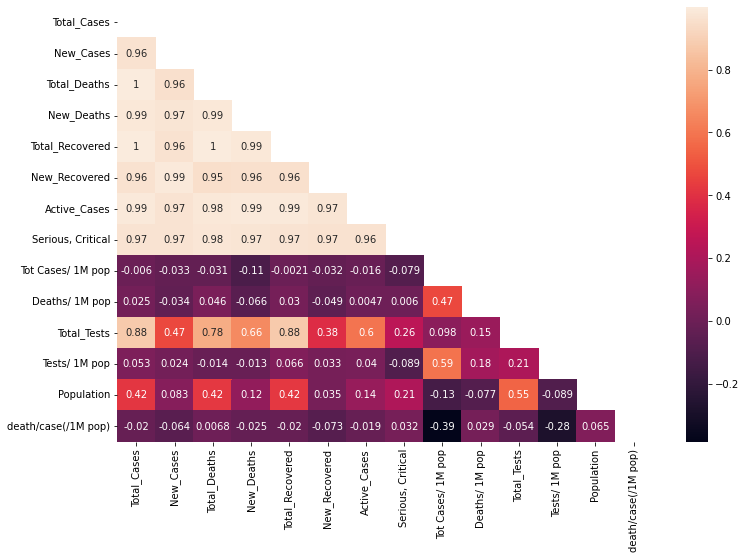

In [ ]:
nation_cor = nation.corr()
mask = np.triu(np.ones_like(nation_cor.corr()))

plt.figure(figsize=(12, 8))
sns.heatmap(nation_cor, annot=True, mask = mask)

**Nhìn vào heatmap ta có thể thấy rằng:**
* Giữa các trường Total_Cases, New_Cases, Total_Deaths, New_Deaths, Total_Recovered, New_Recovered, Active_Cases, Serious, Critical có sự tương quan dương khá lớn. Điều này khá dễ hiểu khi
Total_Cases = Total_Deaths + Total_Recovered + Active_Cases, Total_Recovered = yesterday total_recovered + new_recovered, ...
* Chúng ta cũng thấy được sự tương quan giữa Total_Test và  Total_Cases, Total_Deaths, New_Deaths, Total_Recovered.

#Scatter plot

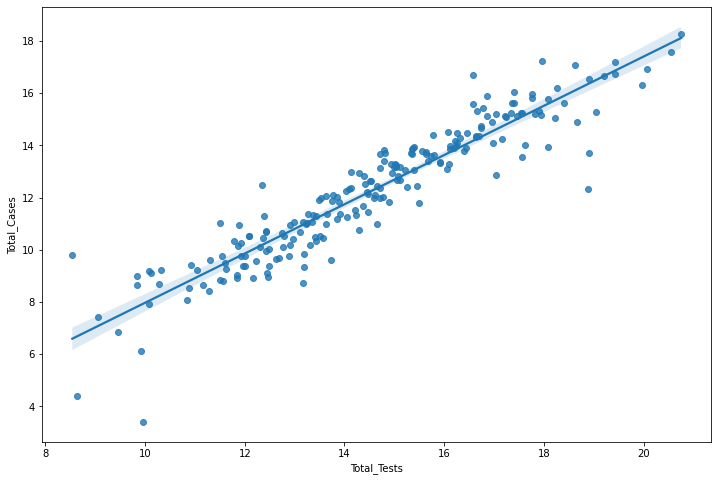

In [ ]:
df_nation = nation[nation['Country, Other'] != 'World']

fig, ax = plt.subplots(figsize=(12, 8))
#logarit scale
ax = sns.regplot(x = np.log(df_nation['Total_Tests']), y = np.log(df_nation['Total_Cases']))

 * Kết luận: Khi có nhiều người thực hiện test COVID-19 thì chúng ta sẽ dễ dàng hơn xác định được những người bị mắc COVID-19 hoặc tái nhiễm COVID-19 cũng nhưng cung cấp chính xác số người đang nhiễm COVID, điều này giúp cho mỗi quốc gia phòng chống COVID tốt hơn.

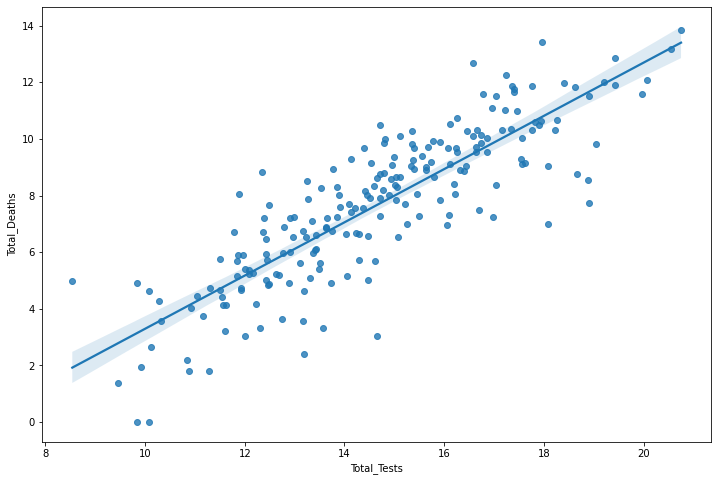

In [ ]:
df_nation = nation[nation['Country, Other'] != 'World']

fig, ax = plt.subplots(figsize=(12, 8))
#logarit scale
ax = sns.regplot(x = np.log(df_nation['Total_Tests']), y = np.log(df_nation['Total_Deaths']))

* Kết luận: Thực hiện Test COVID sẽ giúp cho chúng ta xác định được nguyên nhân tử vong của bệnh nhân nếu không may bệnh nhân tử vong.

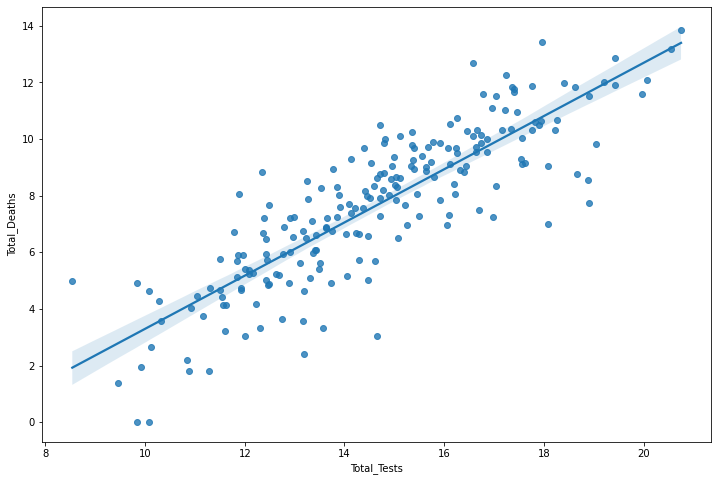

In [ ]:
df_nation = nation[nation['Country, Other'] != 'World']

fig, ax = plt.subplots(figsize=(12, 8))
#logarit scale
ax = sns.regplot(x = np.log(df_nation['Total_Tests']), y = np.log(df_nation['Total_Deaths']))

* Mối quan hệ nhân qua giữa Total_Tests và New_Deaths cũng tương tự như mối quan hệ giữa Total_Tests và Total_Deaths

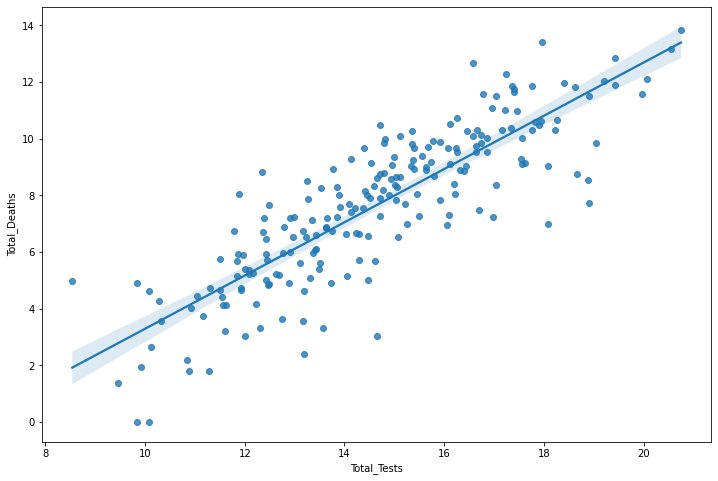

In [ ]:
df_nation = nation[nation['Country, Other'] != 'World']

fig, ax = plt.subplots(figsize=(12, 8))
#logarit scale
ax = sns.regplot(x = np.log(df_nation['Total_Tests']), y = np.log(df_nation['Total_Deaths']))

* Kết luận: Việc thực hiện Test COVID sớm cũng giúp cho bệnh nhân phát hiện sớm bệnh, điều này cũng có thể giúp cho bệnh nhân sớm khỏi bệnh khi việc điều trị được thực hiện sớm.

#REFERENCES
[1]. https://medium.com/swlh/crawl-table-data-with-just-a-few-lines-of-code-3caf2df774ae

[2]. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

[3]. https://stackoverflow.com/questions/48211358/python-store-multiple-dataframe-in-list